In [47]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [48]:
df=pd.read_csv("creditcard.csv")

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
df.shape

(191055, 31)

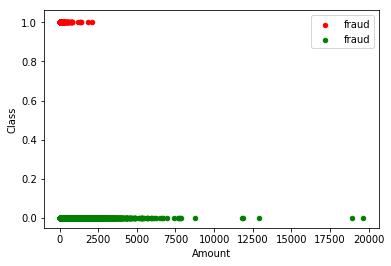

In [51]:
fraud=df.loc[df['Class']==1]
non_fraud=df.loc[df['Class']==0]
ax=fraud.plot.scatter(x='Amount',y='Class',color='Red',label='fraud')
non_fraud.plot.scatter(x='Amount',y='Class',color='Green',label='fraud',ax=ax)
plt.show()


In [52]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [53]:
X.shape

(191055, 30)

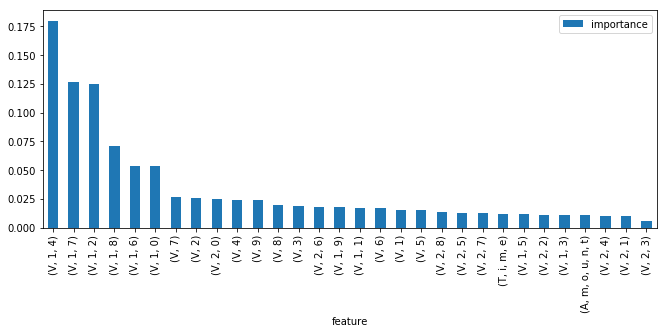

In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)
score=np.round(rfc.feature_importances_,3)
importances = pd.DataFrame({'feature':X,'importance':score})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
plt.rcParams['figure.figsize'] = (11, 4)
importances.plot.bar();

In [ ]:
from sklearn.feature_selection import RFE
import itertools
rfc = RandomForestClassifier()

# create the RFE model and select 10 attributes
rfe = RFE(rfc, n_features_to_select=10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
feature_map = [(i, v) for i, v in itertools.zip_longest(rfe.get_support(), X)]
selected_features = [v for i, v in feature_map if i==True]

In [ ]:
selected_features

In [ ]:
X=X[selected_features]

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
tes=df.iloc[:,-1].values
tes=tes.reshape(-1,1)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(tes,y,test_size=0.3,random_state=0)


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import matthews_corrcoef
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)

In [ ]:
logistic=LogisticRegression()
logistic.fit(X_train,y_train)
pred_logistic=logistic.predict(X_test)
score=accuracy_score(y_test,pred_logistic)
cross_log = model_selection.cross_val_score(logistic, X, y, cv=kfold)
cross_log.mean()

In [ ]:
from sklearn.naive_bayes import MultinomialNB 
gnb = MultinomialNB() 
gnb.fit(X_train, y_train) 
y_pred = gnb.predict(X_test) 
print(" Naive Bayes model accuracy(in %):", accuracy_score(y_test, y_pred)*100)

In [ ]:
score

In [ ]:
confusion_matrix(y_test,pred_logistic)

In [ ]:
print(classification_report(y_test,pred_logistic))

In [ ]:
matthews_corrcoef(y_test,pred_logistic)

In [ ]:
score

In [ ]:
decisiontree=DecisionTreeClassifier()
decisiontree.fit(X_train,y_train)
pred_dt=decisiontree.predict(X_test)
score_dt=accuracy_score(y_test,pred_dt)

In [ ]:
confusion_matrix(y_test,pred_dt)

In [ ]:
score_dt

In [ ]:
random=RandomForestClassifier()
random.fit(X_train,y_train)
pred_rf=random.predict(X_test)
score_rf=accuracy_score(y_test,pred_rf)

In [ ]:
confusion_matrix(y_test,pred_rf)

In [ ]:
score_rf

In [ ]:
from sklearn import model_selection

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
seed=7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
from sklearn.ensemble import VotingClassifier

estimators=[]
model1 = LogisticRegression()
estimators.append(('logistic', model1))
model2 =  GaussianNB()
estimators.append(('nb', model2))
model3=DecisionTreeClassifier()
estimators.append(('dt', model3))
# create the ensemble model
model4=RandomForestClassifier()
estimators.append(('rf', model4))
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X, y, cv=kfold)
print(results.mean())

In [ ]:
ensemble.fit(X_train,y_train)
pred=ensemble.predict(X_test)
accuracy_score(y_test,pred)

In [ ]:
confusion_matrix(y_test,pred)

In [ ]:
matthews_corrcoef(y_test,pred)

In [ ]:
test=np.array([7,-0.644269442,1.417963545,1.074380376,-0.492199018,0.948934095,0.428118463,1.120631358,-3.807864239,0.615374731,1.249376178,-0.619467796,0.291474353,1.757964214,-1.32386522,0.686132504,-0.076126999,-1.222127345,-0.35822157,0.324504731,-0.156741852,1.94346534,-1.01545471,0.05750353,-0.649709006,-0.415266566,-0.051634297,-1.206921081,-1.085339188,40.8])

test=test.reshape(1,-1)
ensemble.predict(test)